In [1]:
import re
import matplotlib.pyplot as plt
import numpy as np

def read_data(file_path):
    # Step 1: Read and parse the file
    # file_path = '/coc/testnvme/chuang475/projects/vlm_robustness/output/domainnet/pcgrad_1e-3_1e-4_1/train_paligemma_domainnet-real_20240909_130251/slurm-948622.out'  # Replace with your file path
    with open(file_path, 'r') as file:
        lines = file.readlines()

    # Variables to store parsed data
    data = {}
    current_t = None

    # Step 2: Extract t, j, loss_strength, and reg_strength
    for i, line in enumerate(lines):
        t_match = re.search(r'==================== t ==================== (\d+)', line)
        
        if t_match:
            current_t = int(t_match.group(1))
            if current_t not in data:
                data[current_t] = {'j': [], 'loss_strength': [], 'reg_strength': []}

            j_match = re.search(r'j:  (\d+)', lines[i+1])
            j = int(j_match.group(1))
            data[current_t]['j'].append(j)

            loss_match = re.search(r'loss_strength:  (\d+)', lines[i+2])
            loss_strength = float(loss_match.group(1))
            data[current_t]['loss_strength'].append(loss_strength)

            reg_match = re.search(r'lamb:  (\d+)', lines[i+3])
            reg_strength = float(reg_match.group(1))
            data[current_t]['reg_strength'].append(reg_strength)

    # print(data)
    return data

# Step 3: Plot the data
def plot_for_t(t, data):
    j_values = data[t]['j']
    loss_values = data[t]['loss_strength']
    reg_values = data[t]['reg_strength']
    
    plt.figure(figsize=(10, 6))

    print(j_values)
    print(loss_values)
    
    plt.plot(j_values, loss_values, label='Loss Strength', marker='o')
    plt.plot(j_values, reg_values, label='Reg Strength', marker='x')
    
    plt.title(f'Plot for t = {t}')
    plt.xlabel('j')
    plt.ylabel('Strength')
    plt.legend()
    plt.grid(True)
    plt.show()

In [12]:
# Define the plot_for_j function
def plot_for_j(j_value, data):
    t_values = []
    loss_values = []
    reg_values = []
    
    # Collect data for the given j value across different t's
    for t in data:
        if j_value in data[t]['j']:
            index = data[t]['j'].index(j_value)  # Get the index of j in the list for t
            t_values.append(t)
            loss_values.append(data[t]['loss_strength'][index])
            reg_values.append(data[t]['reg_strength'][index])
    
    if t_values:
        plt.figure(figsize=(10, 6))
        
        plt.plot(t_values, loss_values, label='Loss Strength', marker='o')
        plt.plot(t_values, reg_values, label='Reg Strength', marker='x')
        
        plt.title(f'Plot for j = {j_value}')
        plt.xlabel('t')
        plt.ylabel('Strength')
        plt.legend()
        plt.grid(True)
        plt.show()
    else:
        print(f"No data found for j = {j_value}")



In [13]:
# Define the plot_for_average_j function
def plot_for_average_j(data):
    t_values = []
    avg_loss_values = []
    avg_reg_values = []
    
    # Calculate the average loss_strength and reg_strength for each t
    for t in data:
        t_values.append(t)
        avg_loss = np.mean(data[t]['loss_strength'])
        # avg_reg = np.mean(data[t]['reg_strength'])
        avg_loss_values.append(avg_loss)
        # avg_reg_values.append(avg_reg)
    
    # Plot the average values
    plt.figure(figsize=(10, 6))
    
    plt.plot(t_values, avg_loss_values, label='Average Loss Strength', marker='o')
    # plt.plot(t_values, avg_reg_values, label='Average Reg Strength', marker='x')
    
    # plt.title('Plot of Average Loss and Reg Strength for All j')
    plt.title('Plot of Average Loss Strength for All j')
    plt.xlabel('t')
    plt.ylabel('Strength')
    plt.legend()
    plt.grid(True)
    plt.show()

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the moving average function
def moving_average(data, window_size=3):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Updated function to include smoothing
def plot_for_average_j(data, window_size=50):
    t_values = []
    avg_loss_values = []
    
    # Calculate the average loss_strength for each t
    for t in data:
        t_values.append(t)
        avg_loss = np.mean(data[t]['loss_strength'])
        avg_loss_values.append(avg_loss)
    
    # Apply moving average for smoothing
    smoothed_avg_loss_values = moving_average(avg_loss_values, window_size)
    smoothed_t_values = t_values[:len(smoothed_avg_loss_values)]  # Adjust t_values to match the smoothed data
    
    # Plot the average values
    plt.figure(figsize=(10, 6))
    
    plt.plot(smoothed_t_values, smoothed_avg_loss_values, label='Smoothed Average Loss Strength', marker='o')
    
    plt.title('Smoothed Plot of Average Loss Strength for All j')
    plt.xlabel('t')
    plt.ylabel('Strength')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage with data
# plot_for_average_j(data)

In [143]:
mu_list = [0.01, 0.1, 0.5, 1, 10]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
import numpy as np
import matplotlib.pyplot as plt
import matplotlib  # Import colormap function
from matplotlib.lines import Line2D

# Updated function to plot multiple datasets with prettier colors and markers at intervals
def plot_multiple_datasets(datas, window_size=3, marker_interval=10, domainnet=False):
    plt.figure(figsize=(10, 6), dpi=300)

    # Use a colormap to get a list of pretty colors
    # cmap = matplotlib.colormaps['Accent']  # You can change 'viridis' to other colormaps like 'plasma', 'inferno', etc.
    cmap = matplotlib.colormaps['Set1']  # Use the Spectral colormap
    num_datasets = len(datas)  # Number of datasets
    
    # List of markers to cycle through
    markers = ['o', 'x', 's', 'D', '^', 'v', '>', '<', 'p', '*']
    
    for i, data in enumerate(datas):
        t_values = []
        avg_loss_values = []
        
        # Calculate the average loss_strength for each t in the current dataset
        for t in data:
            t_values.append(t)
            avg_loss = np.mean(data[t]['loss_strength'])
            avg_loss_values.append(avg_loss)
        
        # Apply moving average for smoothing
        smoothed_avg_loss_values = np.convolve(avg_loss_values, np.ones(window_size)/window_size, mode='valid')
        smoothed_t_values = t_values[:len(smoothed_avg_loss_values)]  # Adjust t_values to match the smoothed data
        
        # Get a color from the colormap
        color = colors[i]  # Map each dataset to a different color
        
        # Plot the full line without markers
        plt.plot(smoothed_t_values, smoothed_avg_loss_values, 
                 label=fr'$\mu$={mu_list[i]}',  # Add a label with the dataset name
                 color=color,  # Prettier color from colormap
                 linewidth=2.5,  # Thinner line
                 alpha=0.8)  # Slightly less transparency
        
        # Plot the markers at intervals
        plt.plot(smoothed_t_values[::marker_interval], smoothed_avg_loss_values[::marker_interval], 
                 marker=markers[i % len(markers)],  # Cycle through the marker list
                 markersize=5,  # Smaller marker size
                 color=color,  # Use the same color for markers
                 linestyle='None')  # No line, only markers

    # Add plot details
    if domainnet:
        plt.title('DomainNet-oVQA (Real)', fontsize=18)
    else:
        plt.title('VQAv2', fontsize=18)
    plt.xlabel('Iterations', fontsize=14)
    plt.ylabel(fr'Projection Strength $\omega$', fontsize=14)
    # Custom legend combining markers and lines
    custom_legend = [Line2D([0], [0], color=colors[i], marker=markers[i % len(markers)], linestyle='-', markersize=5) for i in range(len(datas))]

    # Add a custom legend with the line and marker combined
    plt.legend(custom_legend, [fr'$\mu = {mu_list[i]}$' for i in range(len(datas))])
    plt.grid(True)
    plt.show()

# Example usage with a list of data
# plot_multiple_datasets(datas, marker_interval=10)

In [14]:
d_1e_2="/coc/testnvme/chuang475/projects/vlm_robustness/tpcgrad_share6/output/domainnet/spcg_1e-3_mu1e-2/train_paligemma_domainnet-real_20240916_171725/slurm-953647.out"
d_1e_1="/coc/testnvme/chuang475/projects/vlm_robustness/tpcgrad_share6/output/domainnet/spcg_1e-3_mu1e-1/train_paligemma_domainnet-real_20240916_170312/slurm-953641.out"
d_5e_1="/coc/testnvme/chuang475/projects/vlm_robustness/tpcgrad_share6/output/domainnet/spcg_1e-3_mu0.5/train_paligemma_domainnet-real_20240917_203156/slurm-955867.out"
d_1="/coc/testnvme/chuang475/projects/vlm_robustness/tpcgrad_share6/output/domainnet/spcg_1e-3_mu1/train_paligemma_domainnet-real_20240917_115639/slurm-955139.out"
d_10="/coc/testnvme/chuang475/projects/vlm_robustness/tpcgrad_share6/output/domainnet/spcg_1e-3_mu10/train_paligemma_domainnet-real_20240917_204516/slurm-955869.out"
datas = [read_data(d_1e_2), read_data(d_1e_1), read_data(d_5e_1), read_data(d_1), read_data(d_10)]

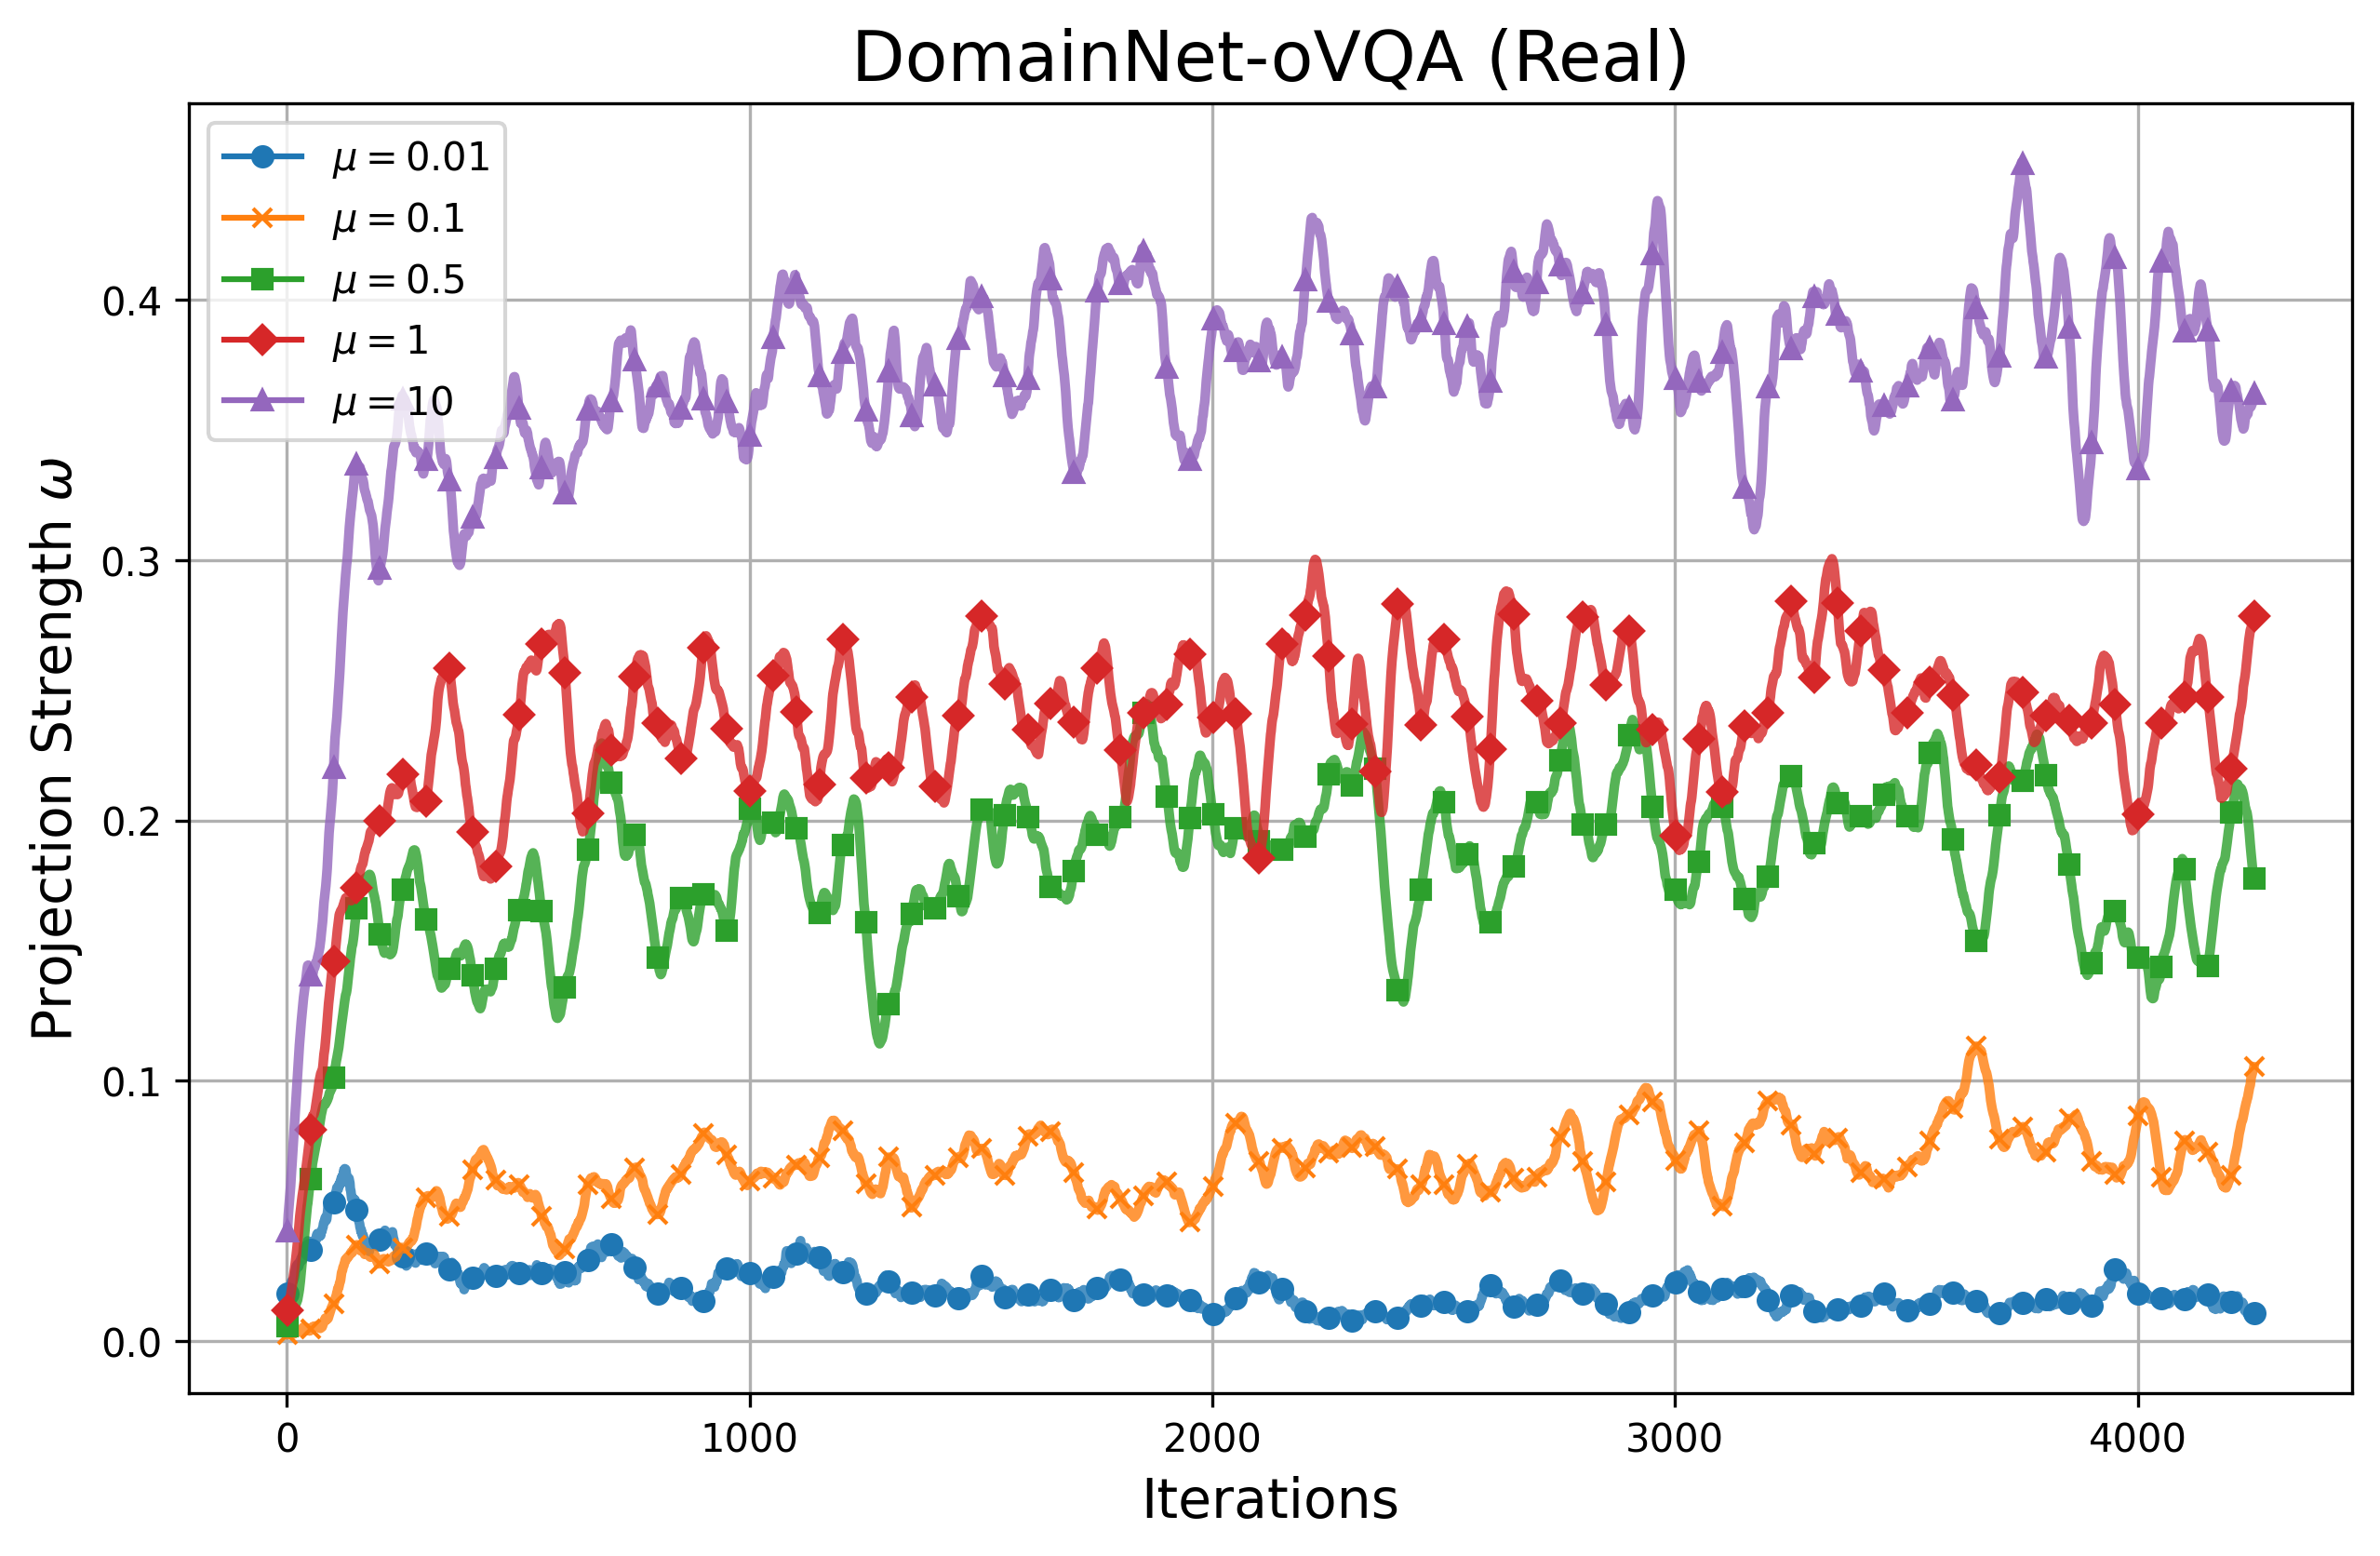

In [144]:
plot_multiple_datasets(datas, window_size=50, marker_interval=50, domainnet=True)

In [23]:
vqa_d_1e_2="/coc/testnvme/chuang475/projects/vlm_robustness/tpcgrad_share6/output/vqa/spcg_1e-3_mu1e-2/train_paligemma_vqa_20240917_114832/slurm-955134.out"
vqa_d_1e_1="/coc/testnvme/chuang475/projects/vlm_robustness/tpcgrad_share6/output/vqa/spcg_1e-3_mu1e-1/train_paligemma_vqa_20240917_113643/slurm-955122.out"
vqa_d_5e_1="/coc/testnvme/chuang475/projects/vlm_robustness/tpcgrad_share6/output/vqa/spcg_1e-3_mu0.5/train_paligemma_vqa_20240918_112732/slurm-956185.out"
vqa_d_1="/coc/testnvme/chuang475/projects/vlm_robustness/tpcgrad_share6/output/vqa/spcg_1e-3_mu1/train_paligemma_vqa_20240917_115250/slurm-955135.out"
vqa_d_10="/coc/testnvme/chuang475/projects/vlm_robustness/tpcgrad_share6/output/vqa/spcg_1e-3_mu10/train_paligemma_vqa_20240917_220018/slurm-955881.out"
vqa_datas = [read_data(vqa_d_1e_2), read_data(vqa_d_1e_1), read_data(vqa_d_5e_1), read_data(vqa_d_1), read_data(vqa_d_10)]

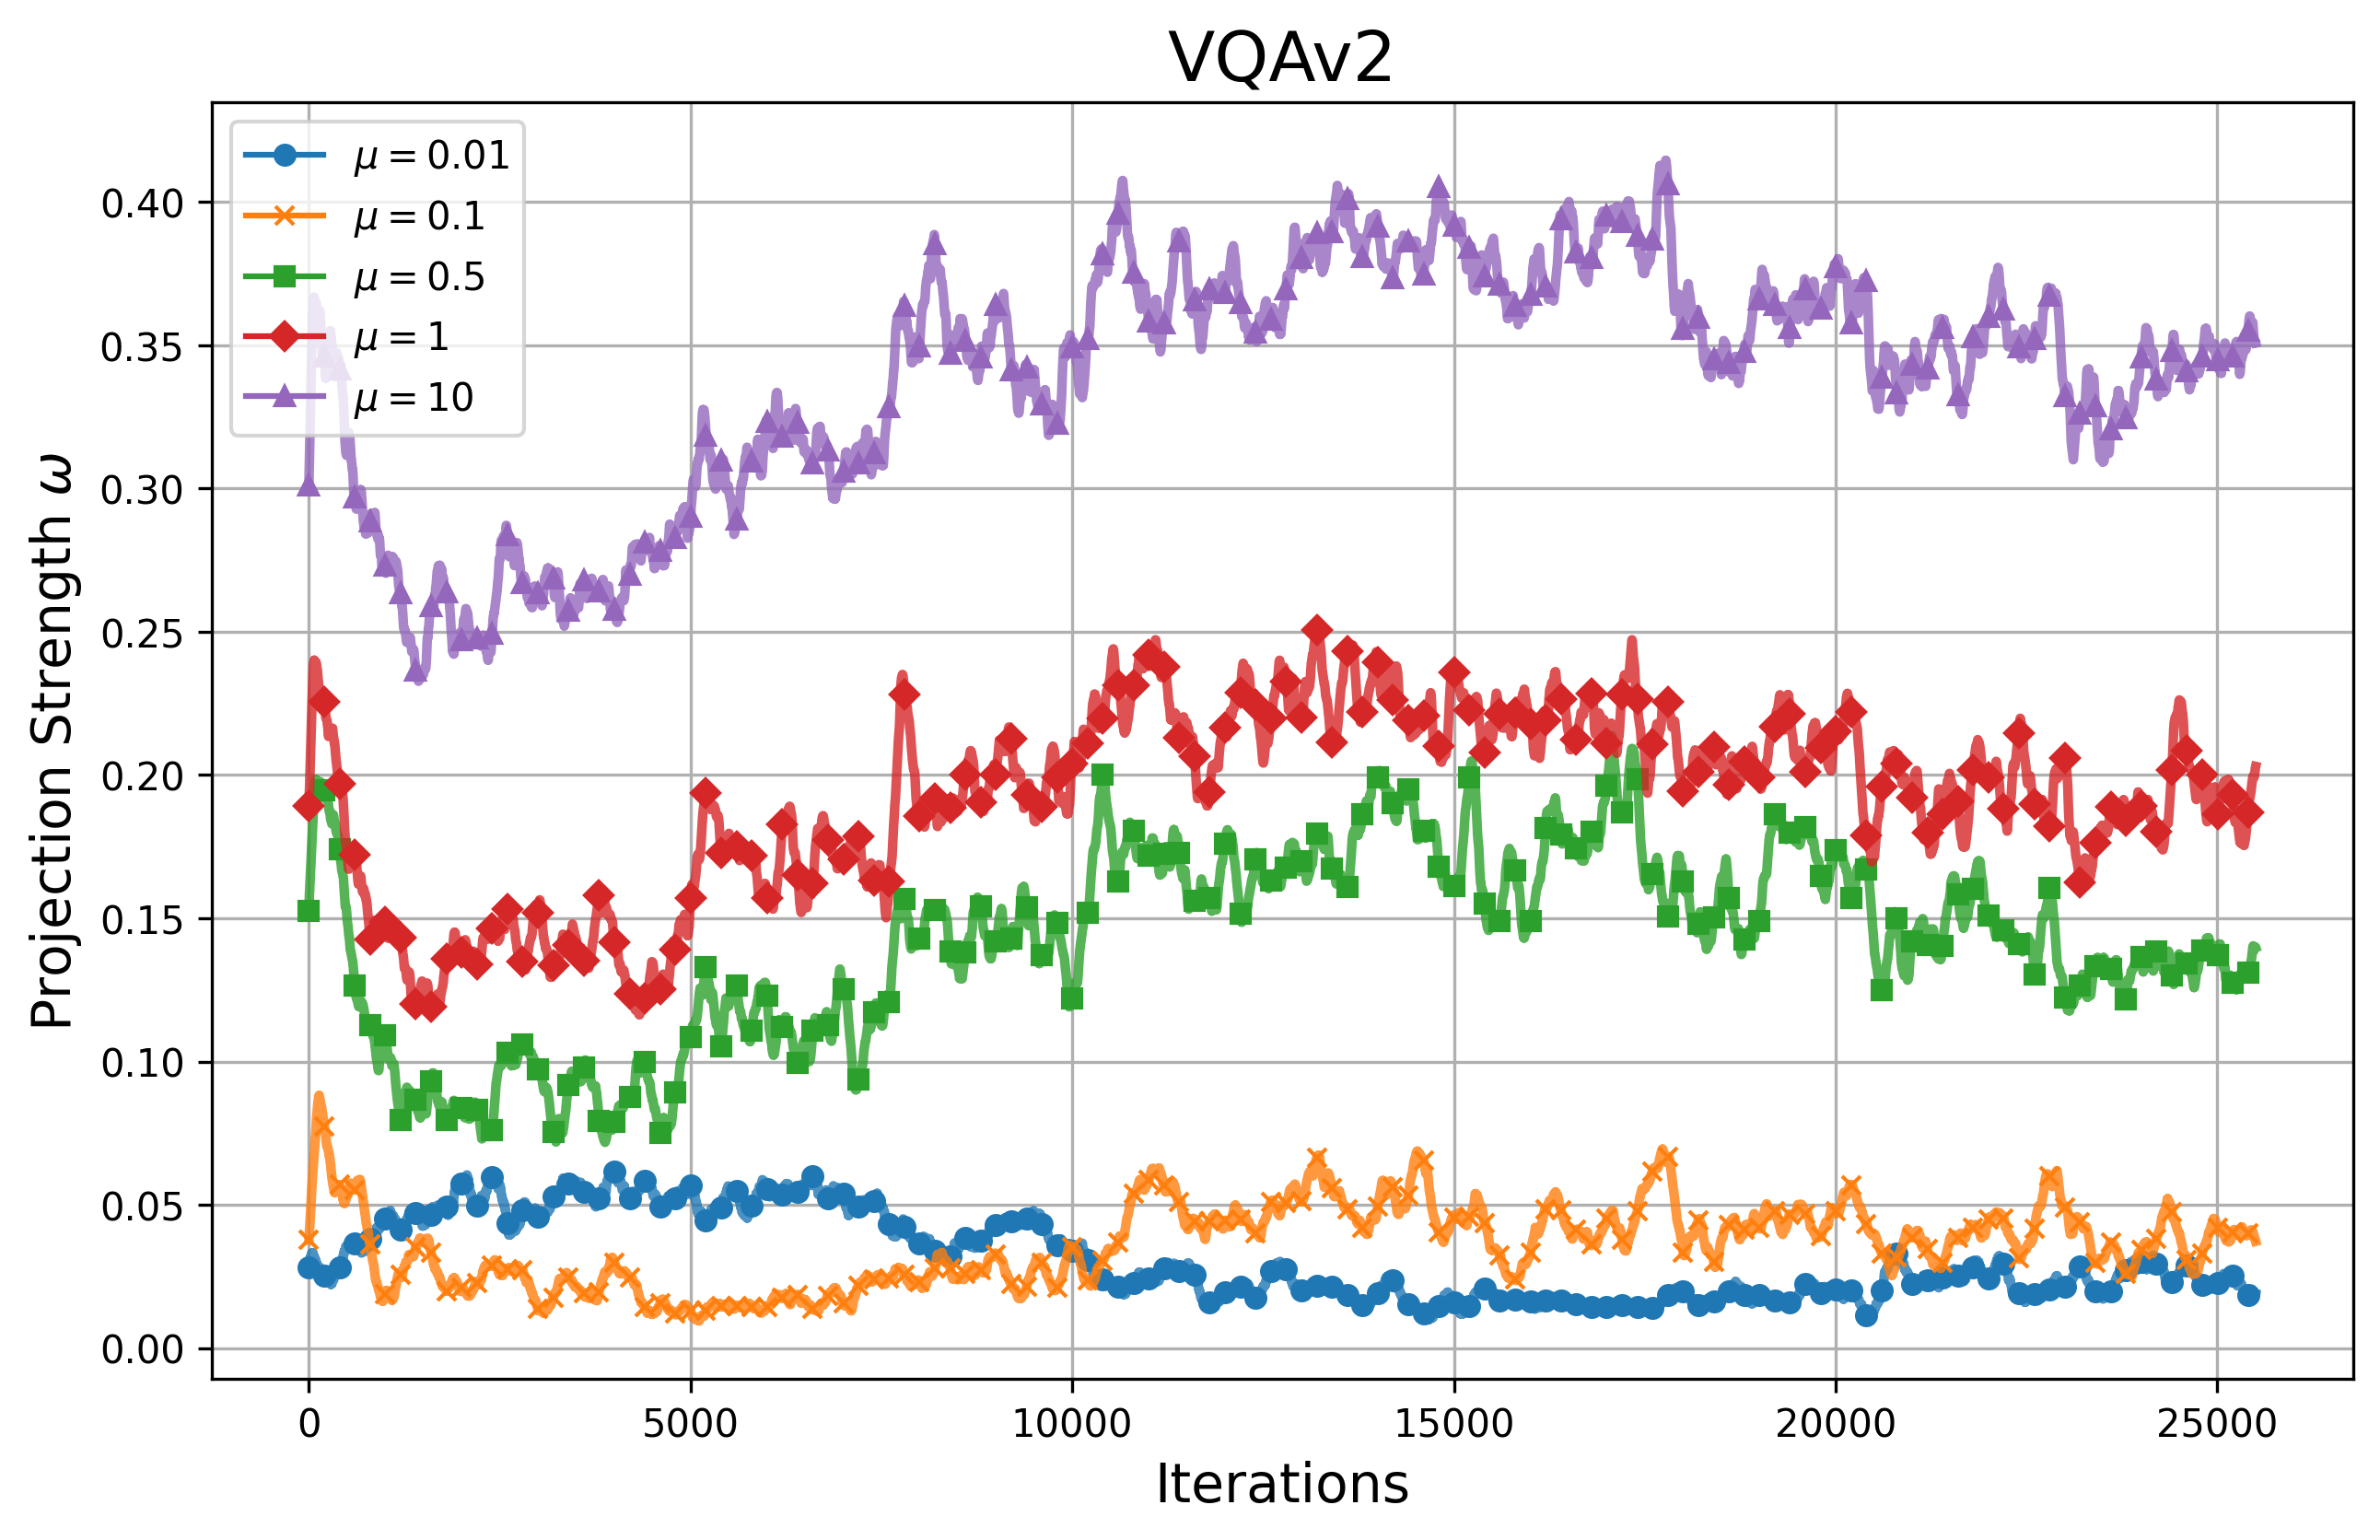

In [145]:
plot_multiple_datasets(vqa_datas, window_size=200, marker_interval=200)

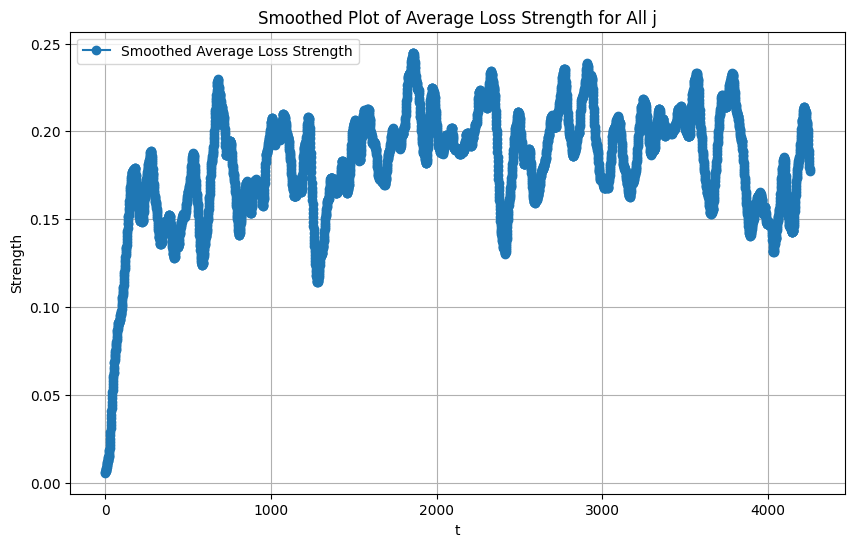

In [11]:
# domainnet spcg_1e-3_mu0.5
file_path = '/coc/testnvme/chuang475/projects/vlm_robustness/tpcgrad_share6/output/domainnet/spcg_1e-3_mu0.5/train_paligemma_domainnet-real_20240917_203156/slurm-955867.out'
data = read_data(file_path)
plot_for_average_j(data)

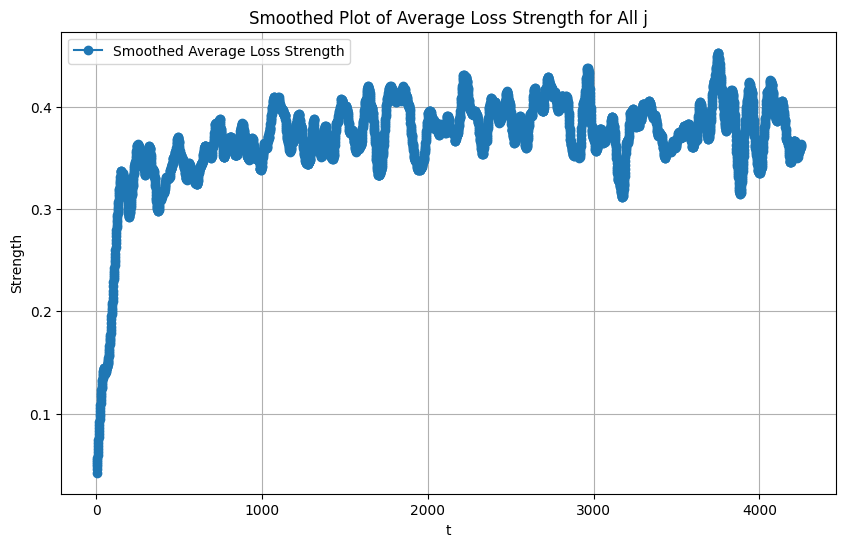

In [12]:
# domainnet spcg_1e-3_mu10
file_path = "/coc/testnvme/chuang475/projects/vlm_robustness/tpcgrad_share6/output/domainnet/spcg_1e-3_mu10/train_paligemma_domainnet-real_20240917_204516/slurm-955869.out"
data = read_data(file_path)
plot_for_average_j(data)

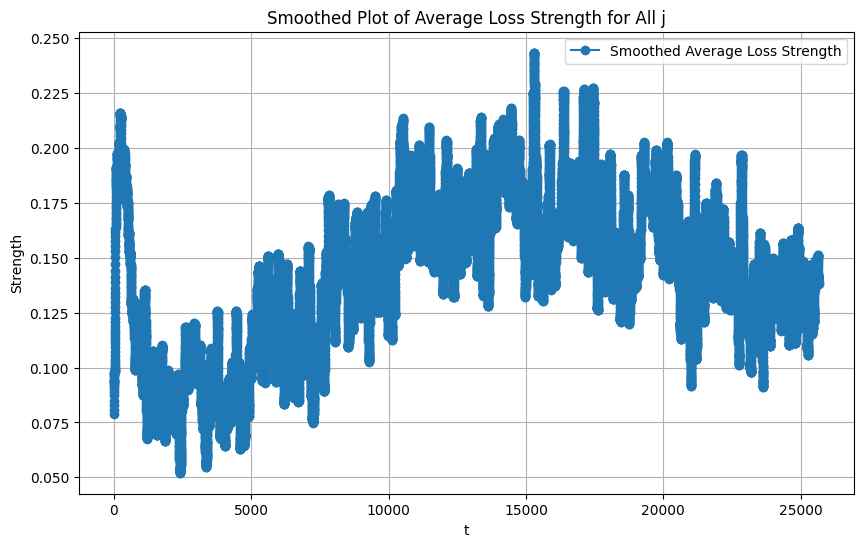

In [13]:
# vqa spcg_1e-3_mu0.5
file_path = '/coc/testnvme/chuang475/projects/vlm_robustness/tpcgrad_share6/output/vqa/spcg_1e-3_mu0.5/train_paligemma_vqa_20240918_112732/slurm-956185.out'
data = read_data(file_path)
plot_for_average_j(data)

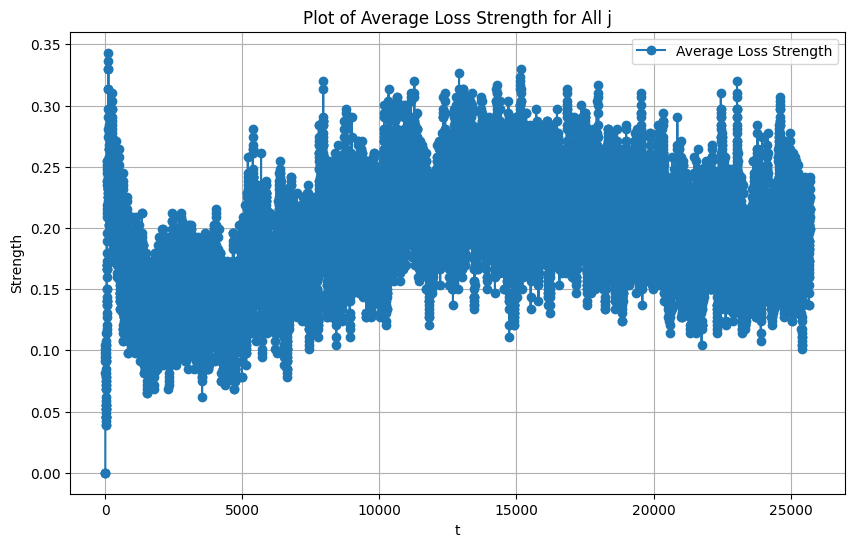

In [7]:
# vqa spcg_1e-3_mu1
file_path = '/coc/testnvme/chuang475/projects/vlm_robustness/tpcgrad_share6/output/vqa/spcg_1e-3_mu1/train_paligemma_vqa_20240917_115250/slurm-955135.out'
data = read_data(file_path)
plot_for_average_j(data)

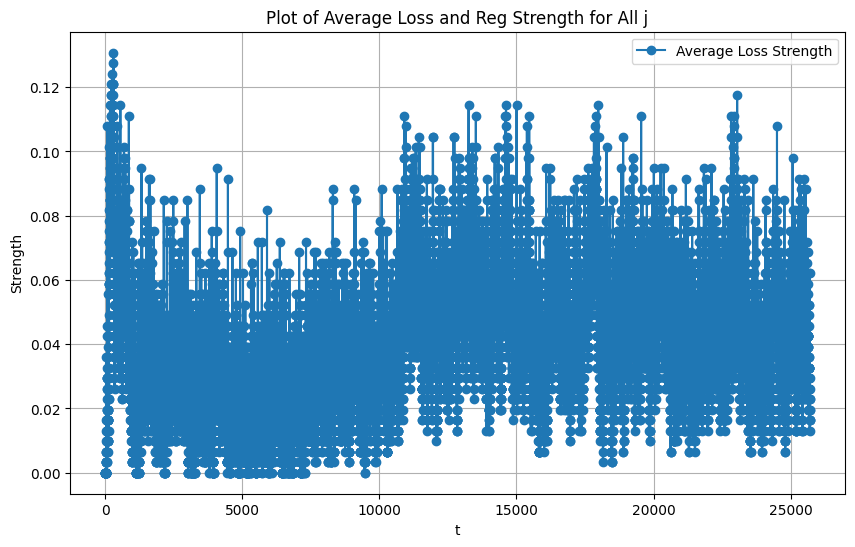

In [10]:
# vqa spcg_1e-3_mu1e-1
file_path = '/coc/testnvme/chuang475/projects/vlm_robustness/tpcgrad_share6/output/vqa/spcg_1e-3_mu1e-1/train_paligemma_vqa_20240917_113643/slurm-955122.out'
data = read_data(file_path)
plot_for_average_j(data)

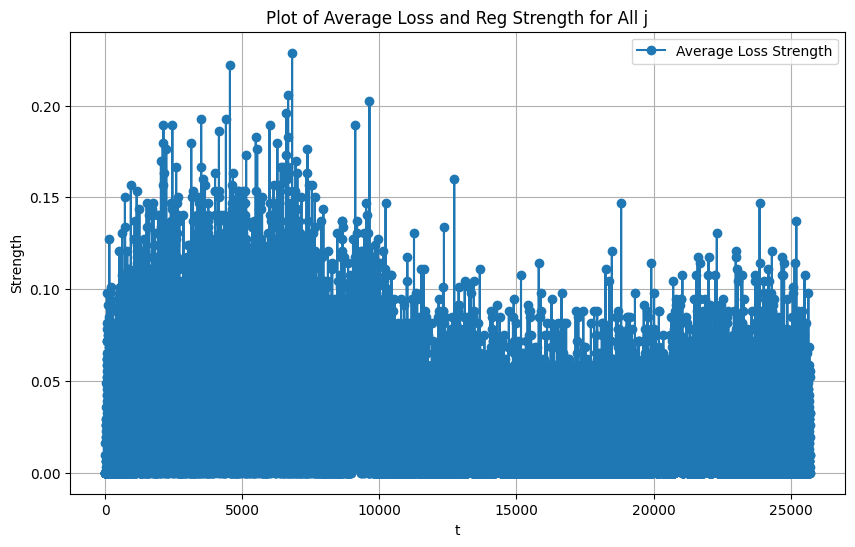

In [11]:
# vqa spcg_1e-3_mu1e-2
file_path = '/coc/testnvme/chuang475/projects/vlm_robustness/tpcgrad_share6/output/vqa/spcg_1e-3_mu1e-2/train_paligemma_vqa_20240917_114832/slurm-955134.out'
data = read_data(file_path)
plot_for_average_j(data)

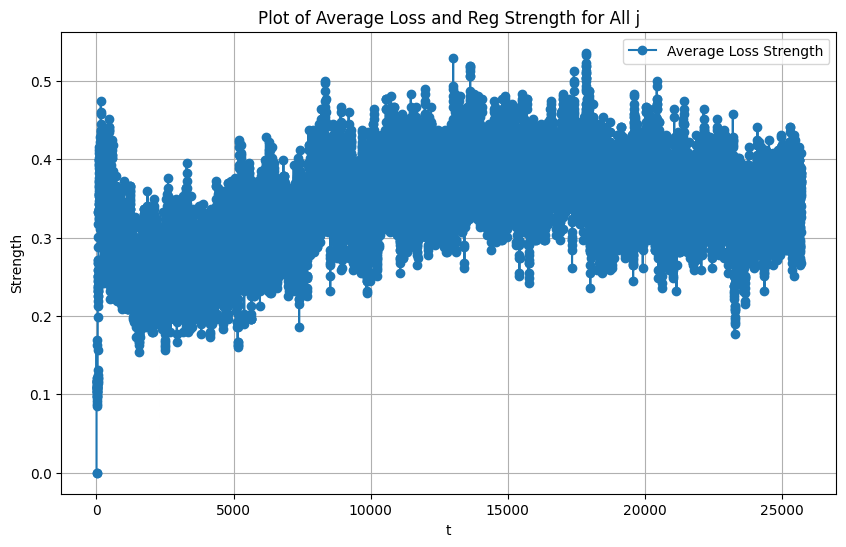

In [12]:
# vqa spcg_1e-3_mu10
file_path = '/coc/testnvme/chuang475/projects/vlm_robustness/tpcgrad_share6/output/vqa/spcg_1e-3_mu10/train_paligemma_vqa_20240917_220018/slurm-955881.out'
data = read_data(file_path)
plot_for_average_j(data)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

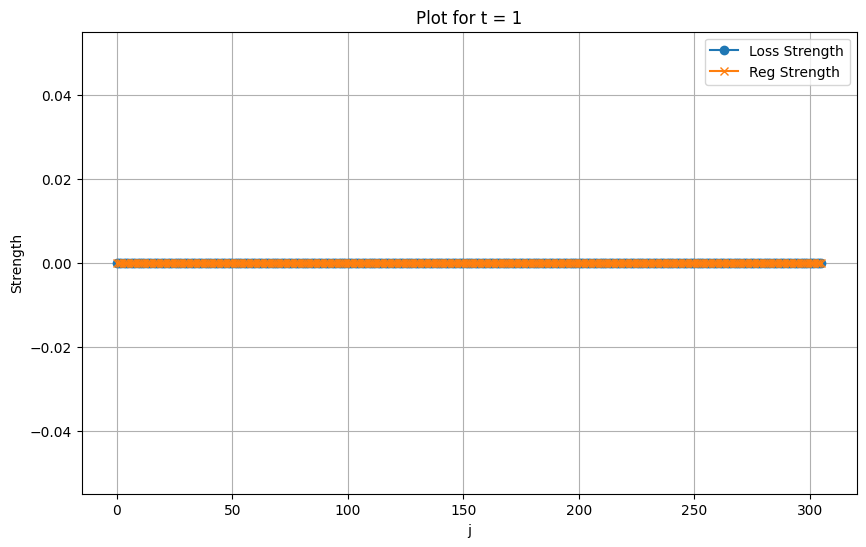

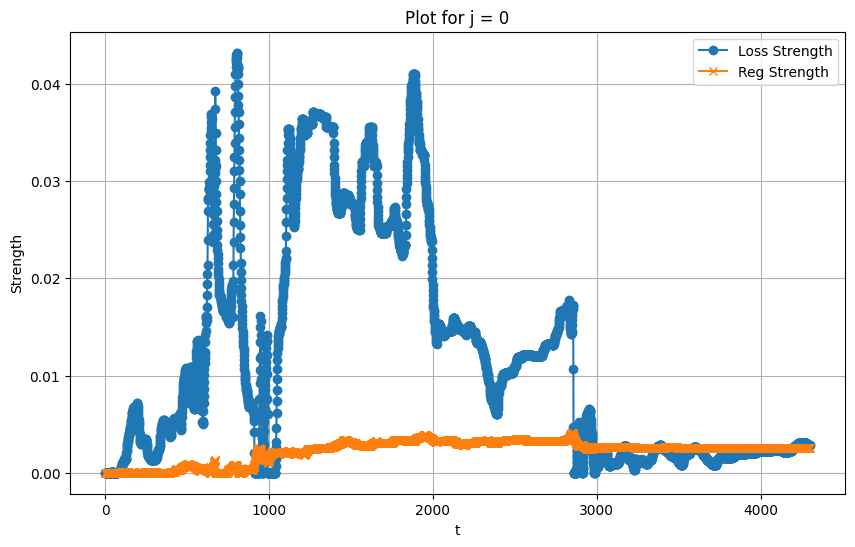

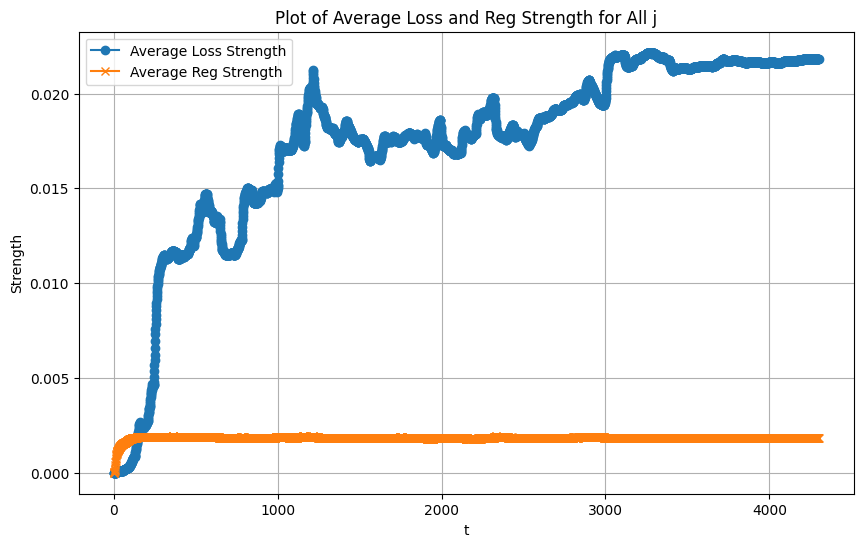

In [8]:
# Example usage
file_path = '/coc/testnvme/chuang475/projects/vlm_robustness/output/domainnet/pcgrad_1e-3_1e-4_1/train_paligemma_domainnet-real_20240909_130251/slurm-948622.out'
data = read_data(file_path)
# Step 4: Plot for the first t = 1
if 1 in data:
    plot_for_t(1, data)
else:
    print("No data for t = 0")

# Example usage: Plot for j = 0
plot_for_j(0, data)

plot_for_average_j(data)

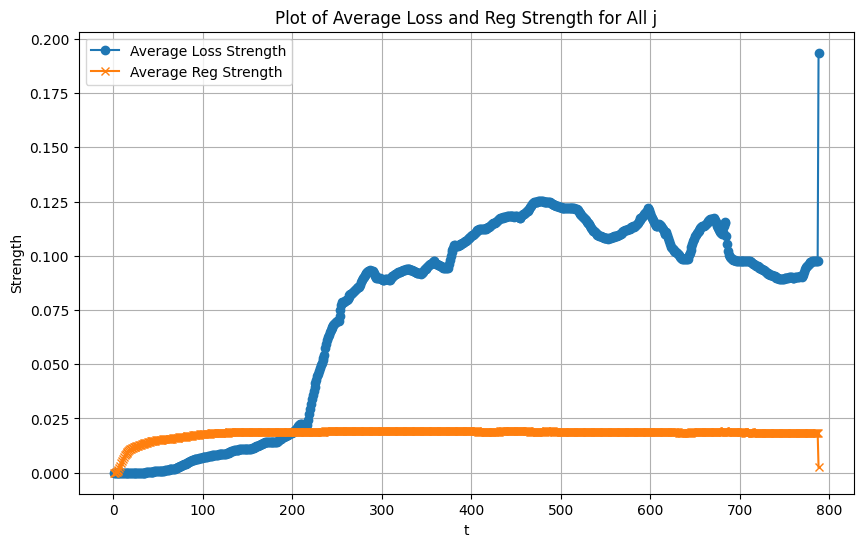

In [9]:
# Example usage
file_path = '/coc/testnvme/chuang475/projects/vlm_robustness/output/domainnet/tpcgrad_1e-3_1e-4_mu1e-1/train_paligemma_domainnet-real_20240909_141728/slurm-948645.out'
data = read_data(file_path)
plot_for_average_j(data)

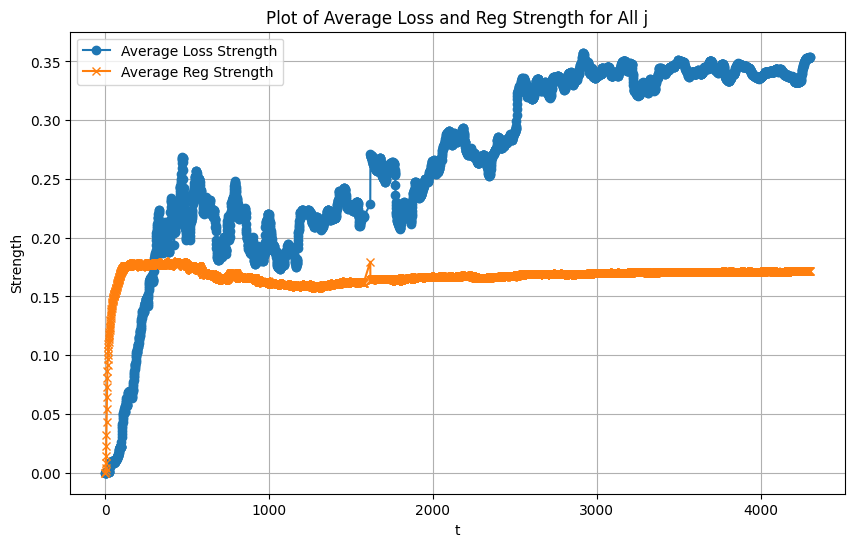

In [10]:
# Example usage
file_path = '/coc/testnvme/chuang475/projects/vlm_robustness/tpcgrad_share6/output/domainnet/tpcgrad_1e-3_1e-4_mu1/train_paligemma_domainnet-real_20240912_123629/slurm-949877.out'
data = read_data(file_path)
plot_for_average_j(data)

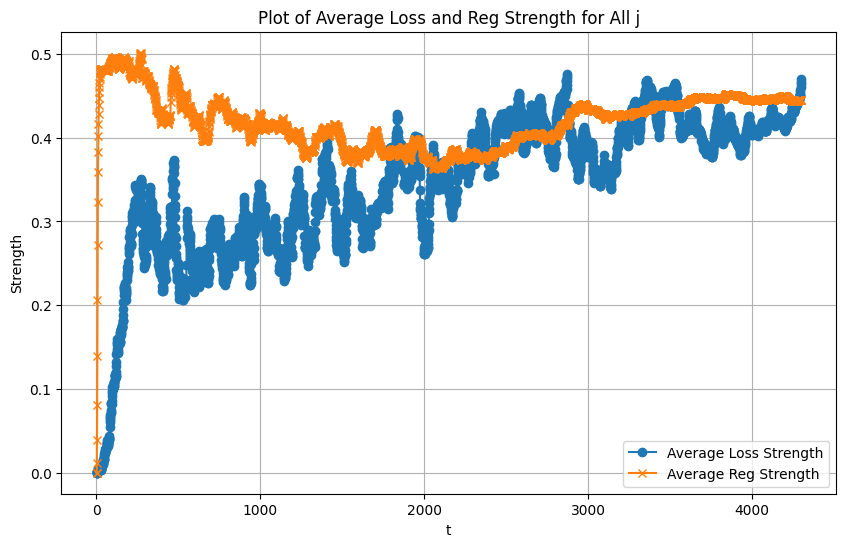

In [11]:
file_path = '/coc/testnvme/chuang475/projects/vlm_robustness/tpcgrad_share6/output/domainnet/tpcgrad_1e-3_1e-4_mu10/train_paligemma_domainnet-real_20240912_155739/slurm-949909.out'
data = read_data(file_path)
plot_for_average_j(data)

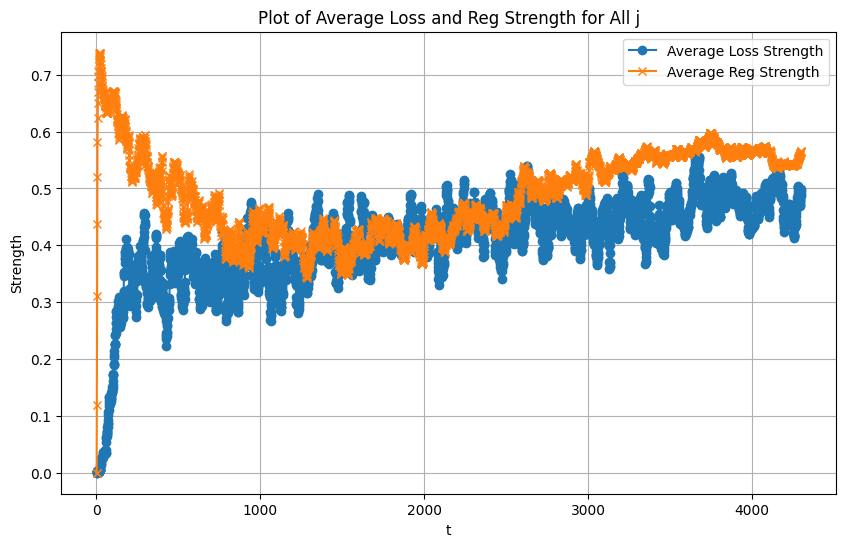

In [12]:
file_path = '/coc/testnvme/chuang475/projects/vlm_robustness/tpcgrad_share6/output/domainnet/tpcgrad_1e-3_1e-4_mu100/train_paligemma_domainnet-real_20240912_160446/slurm-949914.out'
data = read_data(file_path)
plot_for_average_j(data)

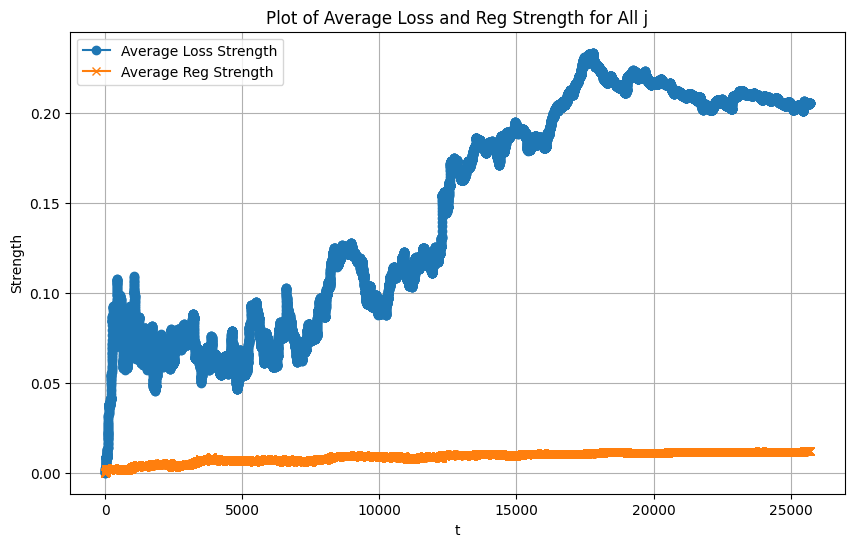

In [13]:
file_path = '/coc/testnvme/chuang475/projects/vlm_robustness/tpcgrad_share6/output/vqa/tpcgrad_1e-3_1e-4_mu1e-1/train_paligemma_vqa_20240911_143630/slurm-949416.out'
data = read_data(file_path)
plot_for_average_j(data)

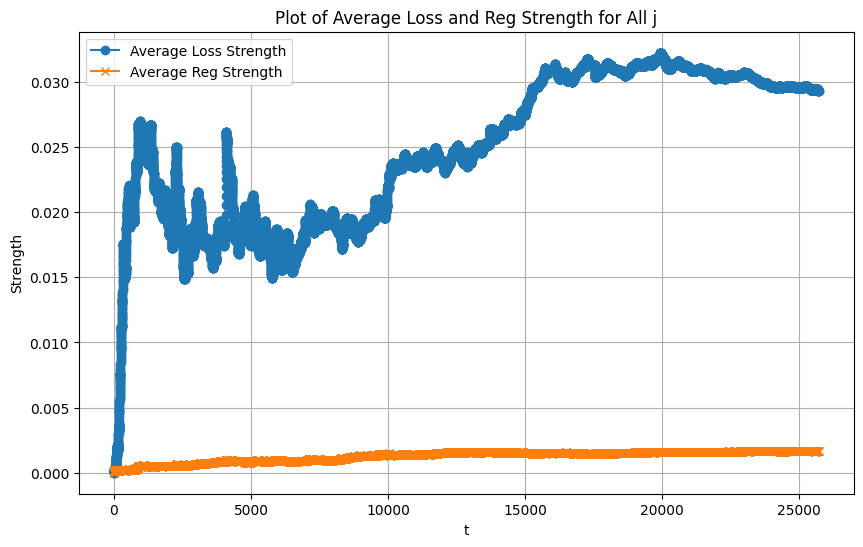

In [14]:
file_path = '/coc/testnvme/chuang475/projects/vlm_robustness/output/vqa/tpcgrad_1e-3_1e-4_mu1e-2/train_paligemma_vqa_20240910_111134/slurm-948897.out'
data = read_data(file_path)
plot_for_average_j(data)

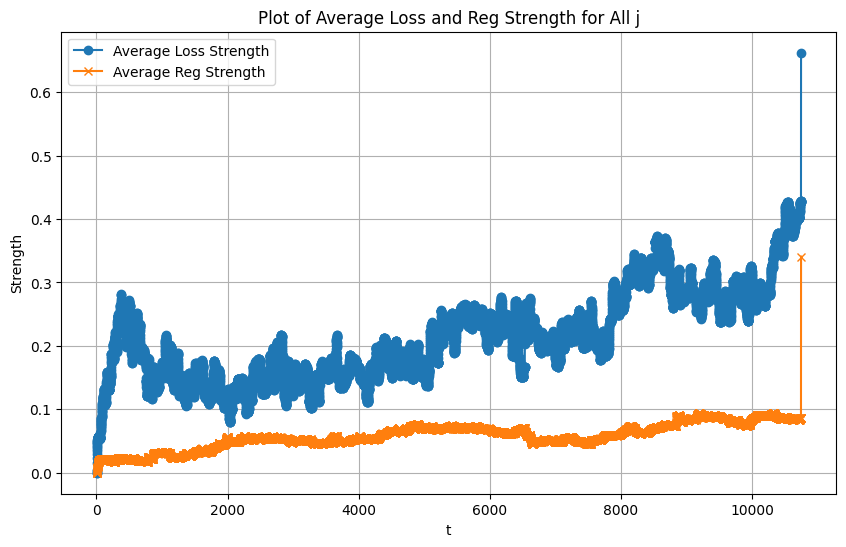

In [16]:
file_path = '/coc/testnvme/chuang475/projects/vlm_robustness/tpcgrad_share6/output/vqa/tpcgrad_1e-3_1e-4_mu1/train_paligemma_vqa_20240912_133942/slurm-949885.out'
data = read_data(file_path)
plot_for_average_j(data)

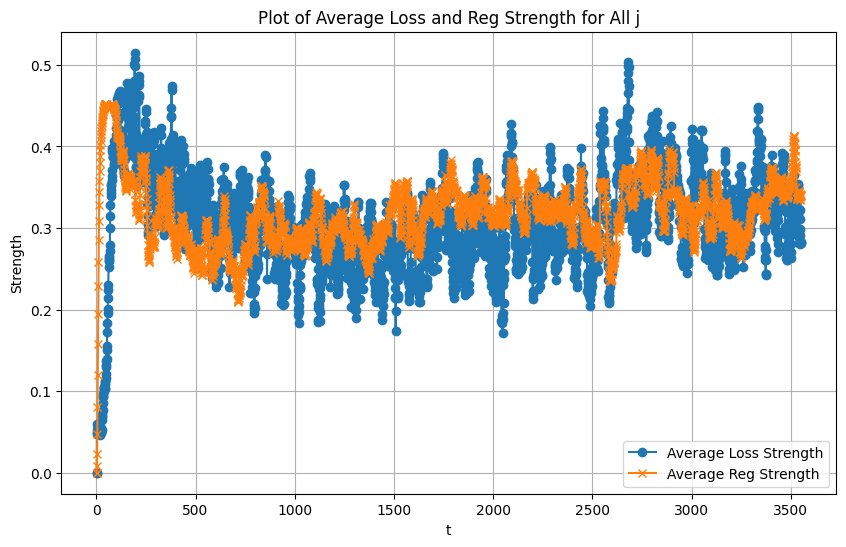

In [ ]:
file_path = '/coc/testnvme/chuang475/projects/vlm_robustness/tpcgrad_share6/output/vqa/tpcgrad_1e-3_1e-4_mu100/train_paligemma_vqa_20240912_165024/slurm-949932.out'
data = read_data(file_path)
plot_for_average_j(data)

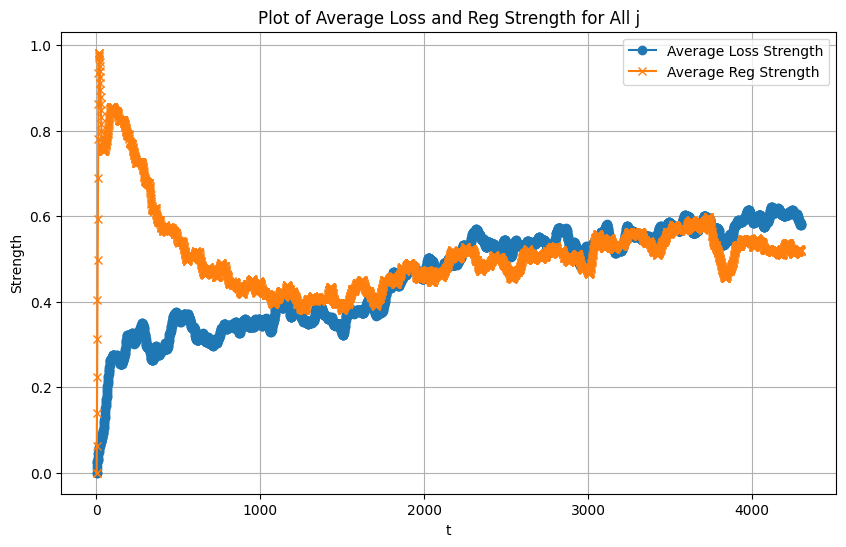

In [4]:
file_path = '/coc/testnvme/chuang475/projects/vlm_robustness/tpcgrad_share6/output/domainnet/tpcgrad_norm_1e-3_1e-4_mu1e-1/train_paligemma_domainnet-real_20240914_204221/slurm-951481.out'
data = read_data(file_path)
plot_for_average_j(data)

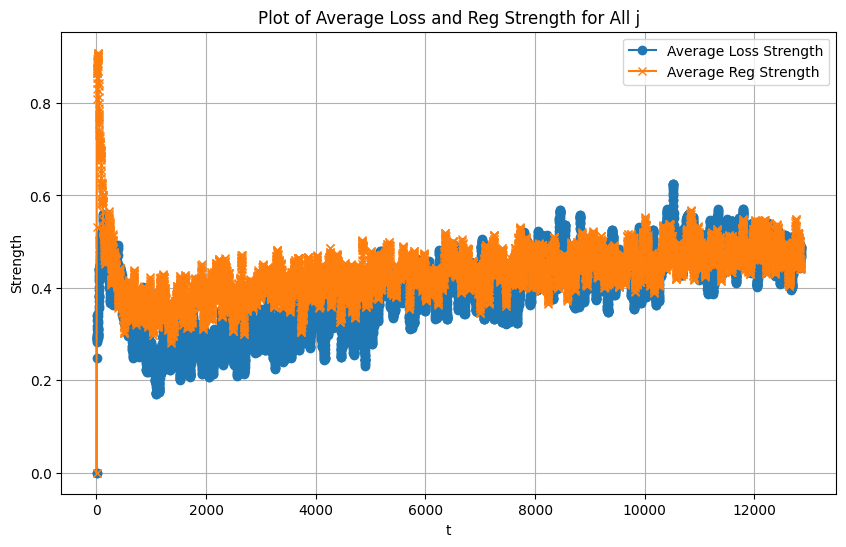

In [5]:
file_path = '/coc/testnvme/chuang475/projects/vlm_robustness/tpcgrad_share6/output/vqa/tpcgrad_norm_1e-3_1e-4_mu1/train_paligemma_vqa_20240915_021333/slurm-951851.out'
data = read_data(file_path)
plot_for_average_j(data)